선수능력 데이터 및 연본 데이터 합치기

In [1]:
import pandas as pd
salary=pd.read_csv('../datasets/Salaries.csv')
bat=pd.read_csv('../datasets/Batting.csv')
df_sal=salary[(salary.yearID==2016) & (salary.salary>0)]; df_bat=bat[bat.yearID==2016]
df=pd.merge(df_sal,df_bat,on='playerID') 
df.head(3)

,yearID_x,teamID_x,lgID_x,playerID,salary,yearID_y,stint,teamID_y,lgID_y,G,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,2016,ARI,NL,ahmedni01,521600,2016,1,ARI,NL,90,...,20.0,5.0,2.0,15,58.0,3.0,4.0,2.0,3.0,9.0
1,2016,ARI,NL,barreja01,507500,2016,1,ARI,NL,68,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,ARI,NL,brachsi01,509300,2016,1,ARI,NL,26,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


stint = 2 이상을 가진 선수 제외 (시즌 중 팀 옮긴 선수)

In [2]:
df.shape

(901, 26)

In [3]:
df.sort_values(['playerID','stint'], ascending=False,inplace = True) 
df['move']=df['playerID'].duplicated() 
df0=df[(df['move']==False)&(df.stint==1)]
df0.shape

(727, 27)

In [4]:
df0.head(3)

,yearID_x,teamID_x,lgID_x,playerID,salary,yearID_y,stint,teamID_y,lgID_y,G,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,move
725,2016,SEA,AL,zychto01,511000,2016,1,SEA,AL,12,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
152,2016,CHN,NL,zobribe01,10500000,2016,1,CHN,NL,147,...,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,False
900,2016,WAS,NL,zimmery01,14000000,2016,1,WAS,NL,115,...,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,False


불필요 변수 제거 

In [5]:
df0.drop(['yearID_x','yearID_y','teamID_y','lgID_y','stint','move'],axis=1,inplace=True)
df0.set_index('playerID',inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df0.head(3)

,teamID_x,lgID_x,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
zychto01,SEA,AL,511000,12,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
zobribe01,CHN,NL,10500000,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
zimmery01,WAS,NL,14000000,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0


상관분석

In [7]:
df_cor=df0.corr() # 피어슨 상관관계
df_cor.style.background_gradient(cmap='coolwarm').set_precision(3)

,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
salary,1.000,0.162,0.225,0.226,0.229,0.198,0.020,0.256,0.265,0.015,0.000,0.260,0.176,0.249,0.124,0.021,0.233,0.282
G,0.162,1.000,0.925,0.903,0.914,0.884,0.598,0.804,0.881,0.503,0.577,0.846,0.865,0.579,0.684,0.065,0.742,0.818
AB,0.225,0.925,1.000,0.973,0.990,0.957,0.642,0.864,0.950,0.544,0.622,0.893,0.926,0.607,0.720,0.112,0.799,0.882
R,0.226,0.903,0.973,1.000,0.977,0.944,0.663,0.889,0.948,0.582,0.652,0.917,0.906,0.626,0.727,0.076,0.787,0.834
H,0.229,0.914,0.990,0.977,1.000,0.968,0.657,0.853,0.949,0.559,0.636,0.881,0.888,0.626,0.714,0.096,0.799,0.877
2B,0.198,0.884,0.957,0.944,0.968,1.000,0.625,0.830,0.931,0.517,0.602,0.855,0.865,0.610,0.692,0.067,0.777,0.846
3B,0.020,0.598,0.642,0.663,0.657,0.625,1.000,0.445,0.554,0.566,0.605,0.586,0.555,0.409,0.488,0.219,0.504,0.447
HR,0.256,0.804,0.864,0.889,0.853,0.830,0.445,1.000,0.944,0.344,0.417,0.840,0.880,0.628,0.650,-0.079,0.719,0.767
RBI,0.265,0.881,0.950,0.948,0.949,0.931,0.554,0.944,1.000,0.433,0.505,0.889,0.896,0.671,0.692,-0.005,0.819,0.866
SB,0.015,0.503,0.544,0.582,0.559,0.517,0.566,0.344,0.433,1.000,0.815,0.487,0.490,0.299,0.401,0.253,0.402,0.371


import seaborn as sns
sns.pairplot(lpga_ds,kind='reg')

In [8]:
cor_target=abs(df_cor['salary'])  #Selecting highly correlated features
cor_target.head(100)

salary    1.000000
G         0.161989
AB        0.224504
R         0.225934
H         0.228776
2B        0.198452
3B        0.019782
HR        0.255621
RBI       0.265483
SB        0.014563
CS        0.000102
BB        0.259812
SO        0.175690
IBB       0.249418
HBP       0.124030
SH        0.021048
SF        0.233030
GIDP      0.282463
Name: salary, dtype: float64

In [9]:
relevant_features=cor_target[cor_target>0.22].index.values.tolist()
relevant_features

['salary', 'AB', 'R', 'H', 'HR', 'RBI', 'BB', 'IBB', 'SF', 'GIDP']

In [10]:
df_fin=df[relevant_features]
df_fin.head(3)

,salary,AB,R,H,HR,RBI,BB,IBB,SF,GIDP
725,511000,0,0,0,0,0.0,0,0.0,0.0,0.0
152,10500000,523,94,142,18,76.0,96,6.0,4.0,17.0
900,14000000,427,60,93,15,46.0,29,1.0,6.0,12.0


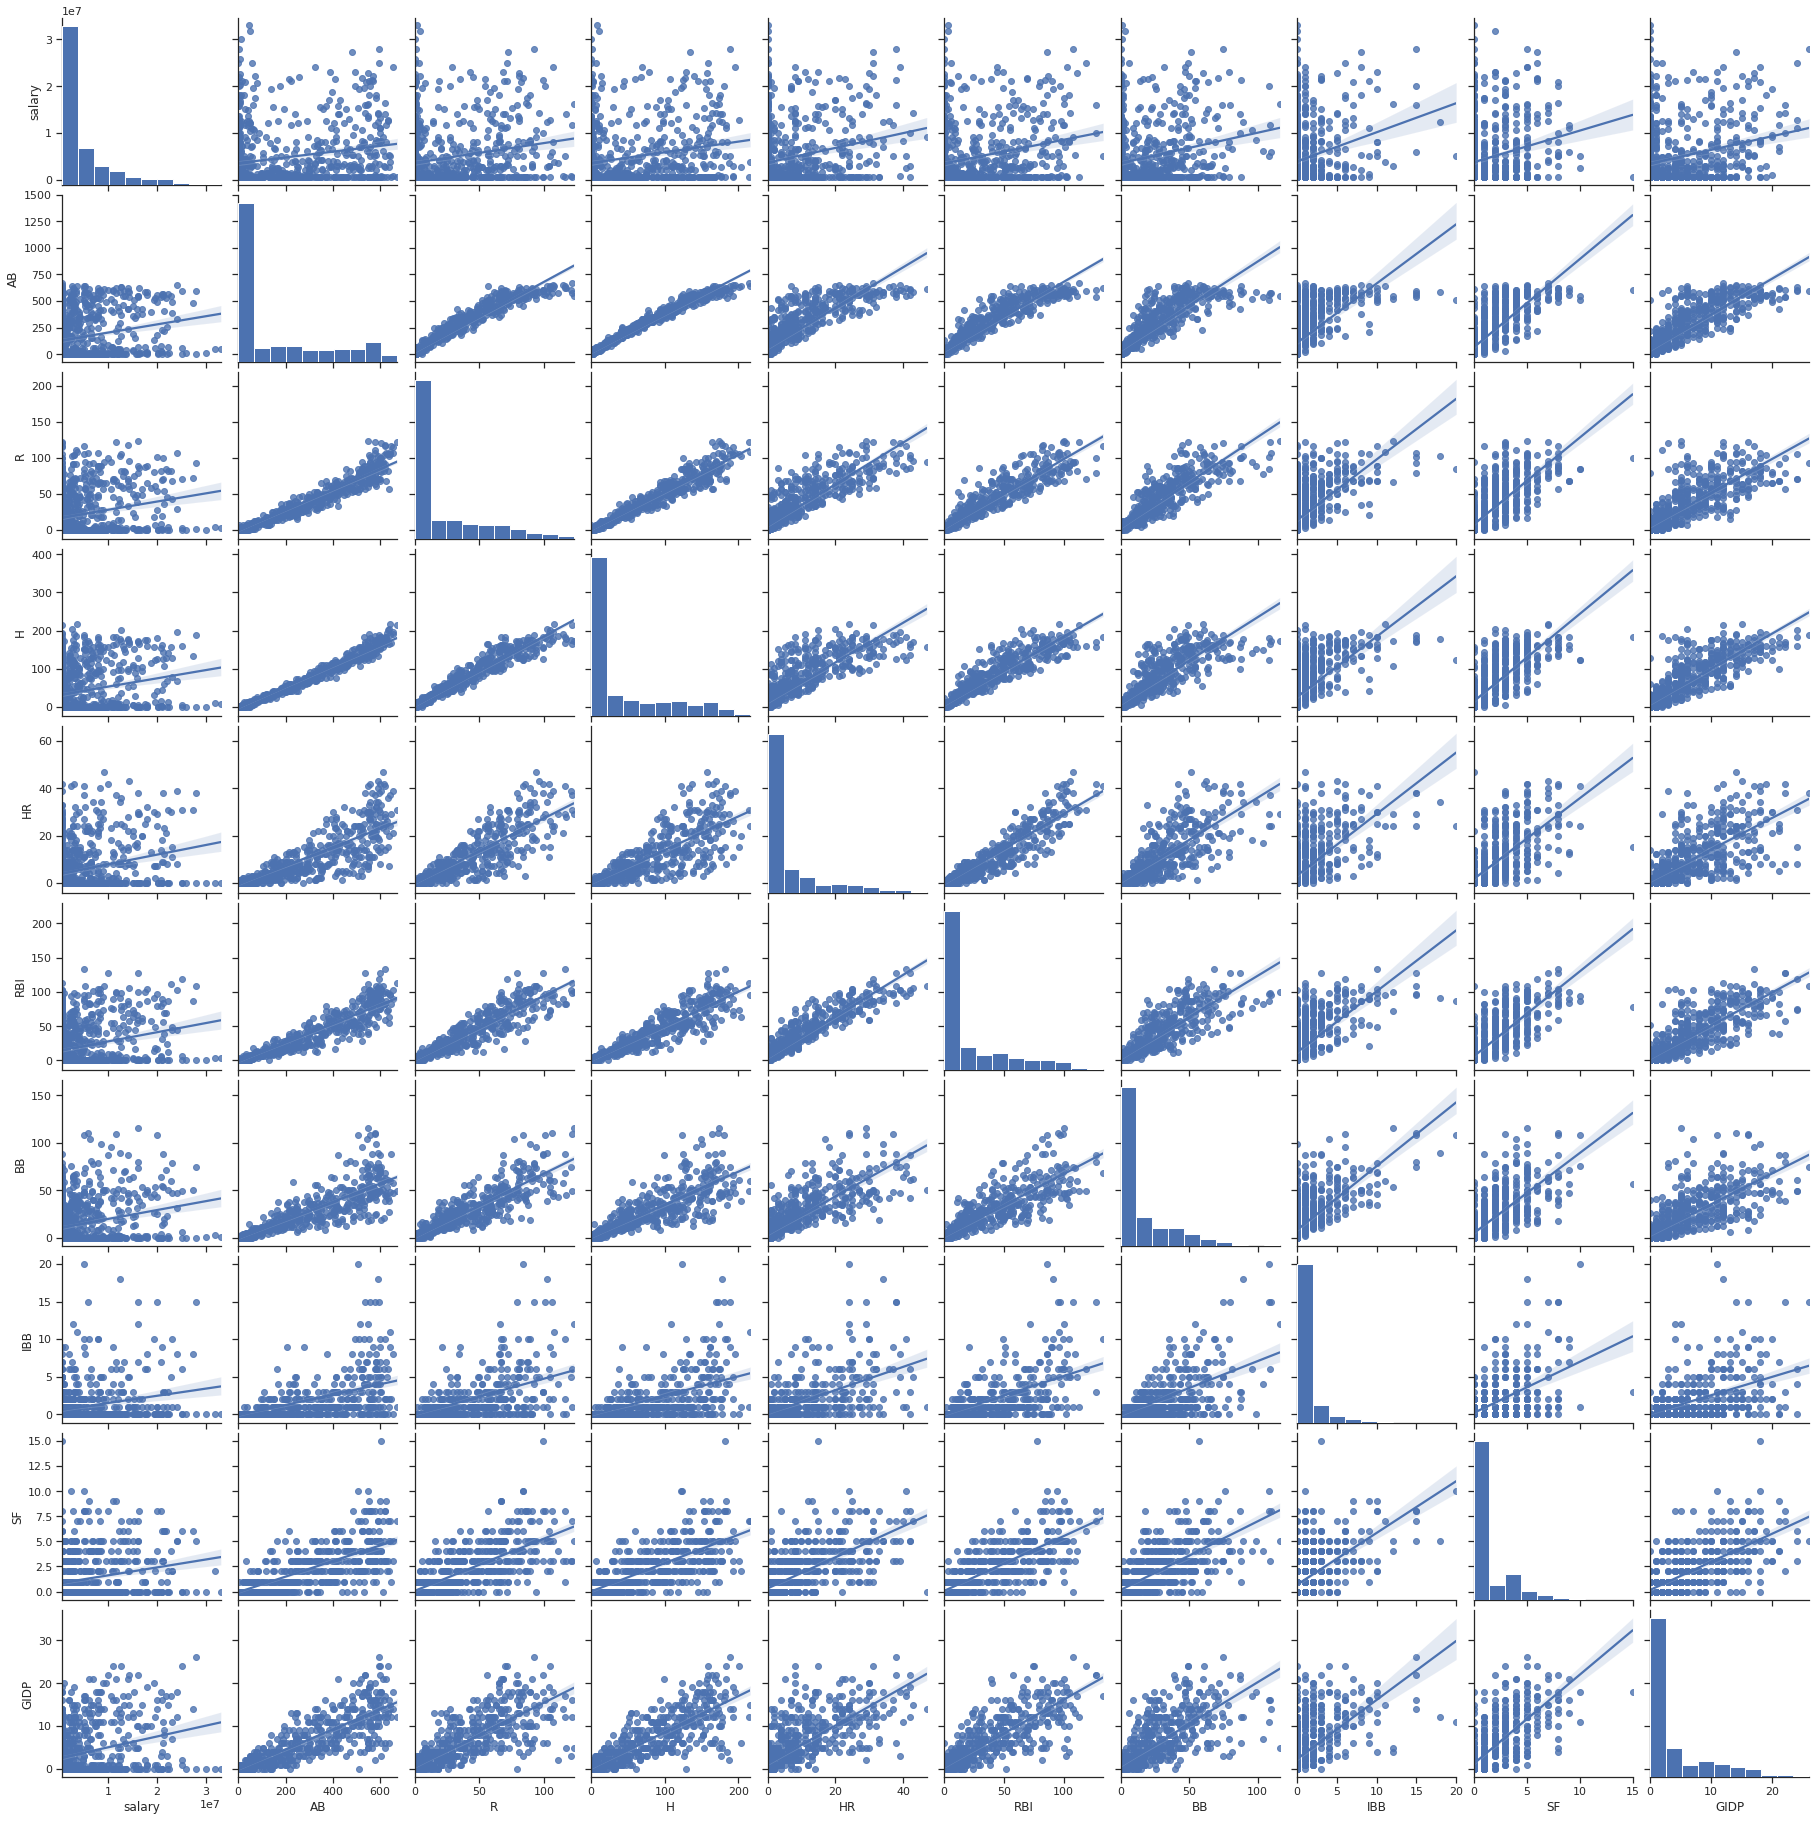

In [11]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df_fin,kind='reg') # 각 column별 데이터에 대한 상관관계나 분류적 특성을 살펴 본다

In [12]:
df_fin.dropna(inplace=True)

<ipython-input-12-58497193ebea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin.dropna(inplace=True)


In [13]:
from sklearn.model_selection import train_test_split
x,y=df_fin.iloc[:,1:10],df_fin.salary
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=123)

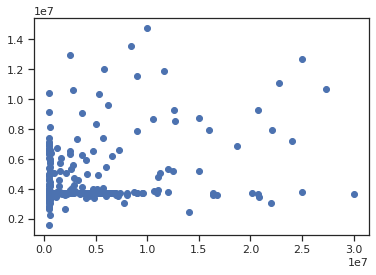

In [14]:
from sklearn.linear_model import LinearRegression as lm
df_fit=lm().fit(x_train,y_train)
pred=df_fit.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)